# Neural network for addition of 2 numbers
### by Börge Göbel

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
import random

## 1 . Prepare training and test data (typically loaded from file)

- Here we generate it

In [83]:
rangeData = 20                             # Numbers from [-rangeData,+rangeData]
lenData = 1000                             # How many pairs of numbers do we generate
testProportion = 0.3                       # 30% testing, 70% training 
testEnd = round(lenData * testProportion)  # How many pairs of numbers are used for testing

- Generate 1000 pairs of numbers as 1000 seperate inputs for our network

In [84]:
dataIn = np.random.randint(-rangeData, rangeData+1, size=(lenData, 2))

In [85]:
dataIn

array([[ -5, -19],
       [  2,  -3],
       [ 15,  -9],
       ...,
       [-16,   6],
       [ -7,  -6],
       [ -4, -20]])

- Generate the corresponding 1000 output values. These will be the sum of the two inputs.
- We do not tell the network that it is the sum. The network shall learn this by itself.

In [86]:
dataOut = dataIn[:,0] + dataIn[:,1]

In [ ]:
dataOut

- Adding a '1' element to each input pair (related to __bias__ - more on this later)

In [88]:
dataIn = np.concatenate([np.ones([lenData,1]), dataIn], axis=1)

In [89]:
dataIn

array([[  1.,  -5., -19.],
       [  1.,   2.,  -3.],
       [  1.,  15.,  -9.],
       ...,
       [  1., -16.,   6.],
       [  1.,  -7.,  -6.],
       [  1.,  -4., -20.]])

- The final data sets and 1 example each

In [90]:
testingIn   = dataIn[0:testEnd]
testingOut  = dataOut[0:testEnd]
trainingIn  = dataIn[testEnd:]
trainingOut = dataOut[testEnd:]

In [91]:
print( testingIn[0] )
print( testingOut[0] )
print( trainingIn[0] )
print( trainingOut[0] )

[  1.  -5. -19.]
-24
[  1. -15.  20.]
5


## 2. Setting up neural network

![Addition_network.png](Addition_network.png)

Input layer length: 3 (1 bias + 2 numbers)

Output layer length: 1 (result)

### 2.1 Initialize weights: Numbers in the range from -2 to 2

- We need a starting point for our weights. Let's select them randomly.

In [92]:
weights = 4 * np.random.random_sample(3) - 2
weights

array([ 0.11294335, -1.73253534, -1.9731904 ])

### 2.2 Activation function

- Typically a monotonuous function that rescales a value to the range [0,1]
- Here it is not necessary (Comes in the other examples)

### 2.3 Calculate output of our neural network

The value of a neuron is given as the dot product of the two vectors: 
- weights 
- value of the neurons in the previous layer (including bias: value 1)

$$y = w_0x_0 + w_1x_1 + w_2x_2$$

In [93]:
def calc_outputs(x, w):
    # x: input
    # w: weights
    return np.dot(x, w)

In [94]:
for i in range(5, 45, 5):
    print(f"{calc_outputs(trainingIn[i], weights):.2f}")

-34.78
-7.78
-10.23
20.18
-22.07
-42.86
-12.78
-9.71


In [95]:
testIndex = 20

- At the end of this notebook (after training our network) we will have the weights

$$w_0 = 0, w_1 = 1, w_2 = 1$$

because then our output will be 

$$y = x_1 + x_2$$

### 2.4 Functions: Calculate accuracy and individual error

### - Accuracy: 
What is the rate at which the output is predicted correctly (only correct and wrong matter)?

In [96]:
1 - np.sum(np.abs(np.sign(np.round(calc_outputs(testingIn, weights)) - testingOut ))) / testEnd

0.023333333333333317

In [97]:
# TODO decompose
def accuracy(testingIn, testingOut, weights):
    return 1 - np.sum(np.abs(np.sign(np.round(calc_outputs(testingIn, weights)) - testingOut ))) / testEnd

In [98]:
accuracy(testingIn, testingOut, weights)

0.023333333333333317

- So far, output is random 

### - Error (better for learning): 
- For a pair of numbers we calculate:

$$\Delta = (y-Y)^2$$

y: Predicted result by the neural network


Y: Correct result (what we have calculated in the beginning)

- Here we only have a single output neuron but in general 

$$\Delta = (\vec{y}-\vec{Y})^2=\sum_j (y_j-Y_j)^2$$

In [99]:
from statistics import correlation


def error(predicted_values, correct_values):
    return np.sum(predicted_values - correct_values)**2

In [100]:
error(calc_outputs(trainingIn[testIndex], weights), trainingOut[testIndex])

1035.6426517315717

### 2.5 Function: Calculate gradient (d Error / d weight)

- All derivatives with respect to the individual weights (use chain rule)

$$\frac{\partial }{\partial w_i}\Delta = 2(y-Y)\cdot x_i$$

In [101]:
def gradient_slow(x, w, correct_values):
    return np.array([2 * (calc_outputs(x, w) - correct_values) * x[index_weight] for index_weight in range(3)])

In [102]:
gradient_slow(trainingIn[testIndex], weights, trainingOut[testIndex])

array([  64.36280453, -965.44206795,  193.08841359])

In [103]:
def gradient(x, w, correct_values):
    return 2 * (calc_outputs(x, w) - correct_values) * x

In [104]:
gradient(trainingIn[testIndex], weights, trainingOut[testIndex])

array([  64.36280453, -965.44206795,  193.08841359])

## 3. Training: Use Gradient descent to change weights to minimize the error

Repeat the following process many times:
- Select an input pair (index)
- Calculate the gradient of the error 
- Change weights accoding to 

$$w_\mathrm{new} = w_\mathrm{old} - learingRate\cdot gradient$$

In [105]:
learning_rate = 0.001
steps = 10000

error_list = [error(calc_outputs(trainingIn[testIndex], weights), trainingOut[testIndex])]
weight_list = [weights]

In [106]:
for i in range(steps):
    # random input
    index = np.random.randint(lenData - testEnd)
    # update weights aka 'downhill'
    weights = weights - learning_rate * gradient(trainingIn[index], weights, trainingOut[index])
    weight_list.append(weights)
    # calc the new error
    err = error(calc_outputs(trainingIn[index], weights), trainingOut[index])
    error_list.append(err)

In [107]:
print(f"{err}")

5.259932696595993e-22


In [108]:
print(f"{weights}")

[6.0988507e-10 1.0000000e+00 1.0000000e+00]


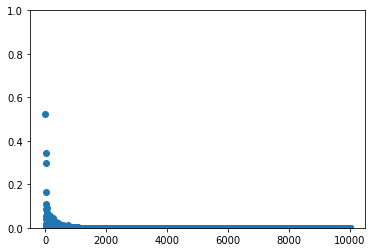

In [109]:
plt.ylim([0, 1])
plt.scatter(range(steps+1), error_list)

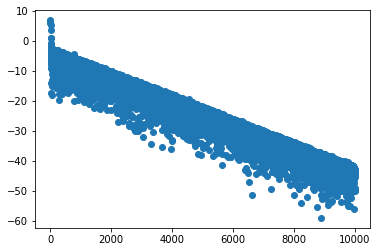

In [110]:
# plt.ylim([0, 1])
plt.scatter(range(steps+1), np.log(error_list))

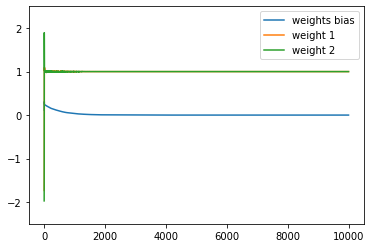

In [111]:
plt.ylim([-2.5, 2.5])

plt.plot(range(steps+1), np.array(weight_list)[:,0], label='weights bias')
plt.plot(range(steps+1), np.array(weight_list)[:,1], label='weight 1')
plt.plot(range(steps+1), np.array(weight_list)[:,2], label='weight 2')
plt.legend()
plt.show()

## 4. Application to test data set (new data)

In [121]:
testingIn[:10]

array([[  1.,  -5., -19.],
       [  1.,   2.,  -3.],
       [  1.,  15.,  -9.],
       [  1.,  -6.,  20.],
       [  1.,   6.,   4.],
       [  1.,  14.,   4.],
       [  1.,  -4.,  20.],
       [  1.,  14.,   1.],
       [  1.,   1., -14.],
       [  1.,  -3., -10.]])

In [120]:
testingOut[:10]

array([-24,  -1,   6,  14,  10,  18,  16,  15, -13, -13])

In [115]:
np.round(calc_outputs(testingIn, weights))[:10]

array([-24.,  -1.,   6.,  14.,  10.,  18.,  16.,  15., -13., -13.])

In [123]:
# accuracy before learning
0.023333333333333317
# accuracy again after learning
accuracy(testingIn, testingOut, weights)

1.0